In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
t = np.array([16.7, 16.7, 83.3, 150.0, 50.0, 16.7, 16.7, 16.7, 116.7, 300, 16.7, 16.7, 16.7, 16.7])

z = np.array([10, 7, 7, 9, 5, 11, 7, 10, 15, 25, 12, 8, 7, 10])

print(len(t), len(z)) 

14 14


In [12]:
import math

# uncertainties
sigma_t = 1000 / 60  # 16.67 ms
sigma_z = 2.5  # mm


velocities = z / t  
mean_velocity = np.mean(velocities)

# error propagation for velocity
sigma_velocity = np.sqrt(np.sum((velocities**2) * ((sigma_z / z)**2 + (sigma_t / t)**2))) / len(t)

mean_velocity_cm_s = mean_velocity * 100
sigma_velocity_cm_s = sigma_velocity * 100

# Print velocity
print(f"Velocity: ({mean_velocity_cm_s:.2f} ± {sigma_velocity_cm_s:.2f}) cm/s")

# constants for delta calculation
mu = 1.8e-3  # Pa·s 
rho = 1000   # kg/m³ 
g = 9.81     # m/s²

# Function to calculate delta
def calculate_delta(u):
    return math.sqrt((3 * mu * u) / (rho * g))

delta_result = calculate_delta(mean_velocity)

# error propagation for delta
sigma_delta = (0.5 * delta_result * (sigma_velocity / mean_velocity))

delta_microns = delta_result * 1e6
sigma_delta_microns = sigma_delta * 1e6

print(f"Delta: ({delta_result:.6e} ± {sigma_delta:.6e}) m")

print(f"Delta: ({delta_microns:.2f} ± {sigma_delta_microns:.2f}) µm")


Velocity: (38.33 ± 12.33) cm/s
Delta: (4.593323e-04 ± 7.387190e-05) m
Delta: (459.33 ± 73.87) µm


In [13]:
# Compute median velocity
median_velocity = np.median(velocities)

delta_median_microns = delta_median * 1e6
sigma_delta_median_microns = sigma_delta_median * 1e6


print(f"Delta (Median): {delta_median_microns:.2f} µm")


Delta (Median): 480.34 µm


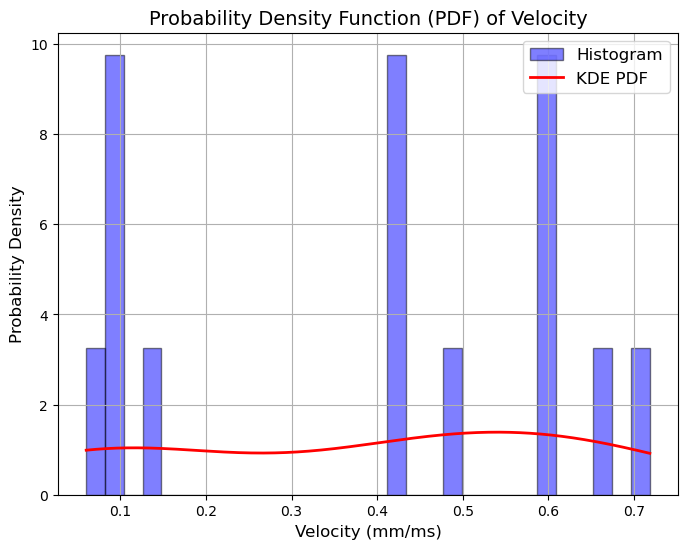

In [ ]:

 
# Fit a kernel density estimate (KDE) to the velocities
kde = stats.gaussian_kde(velocities, bw_method='scott')

vel_values = np.linspace(min(velocities), max(velocities), 500)

# Compute the probability density function
pdf_values = kde(vel_values)


plt.figure(figsize=(8, 6))
plt.hist(velocities, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black', label='Histogram')  # Increased bins
plt.plot(vel_values, pdf_values, color='red', linewidth=2, label='KDE PDF')


plt.xlabel('Velocity (mm/ms)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Probability Density Function (PDF) of Velocity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)


plt.show()
